In [1]:
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.utils 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

data = pd.read_csv('Data_for_UCI_named.csv')
data.head(4)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable


In [2]:
data.shape

(10000, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


<AxesSubplot:>

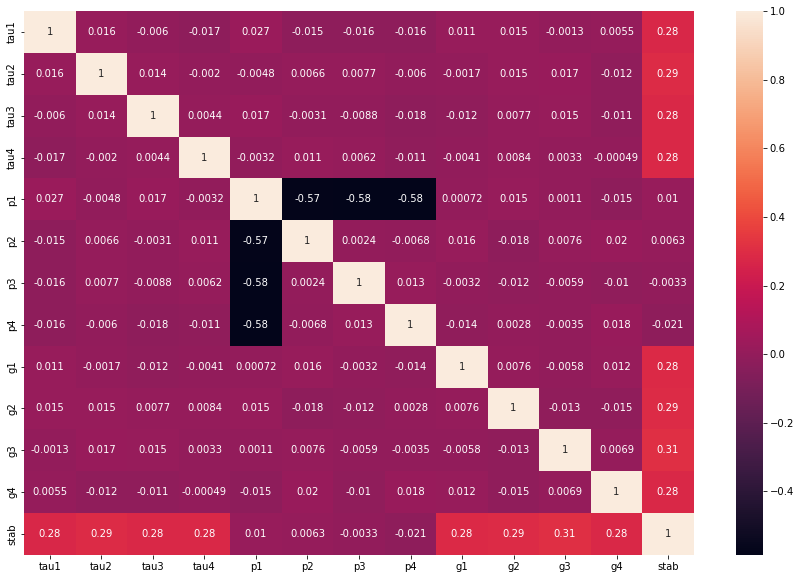

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
columns = data.columns

sns.heatmap(data=data.corr(), annot=True)


In [6]:
data = data.drop(columns=['stab'])
data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
data.stabf = data.stabf.astype('category')
data.stabf = data.stabf.cat.codes
data.stabf.value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [8]:
data_stab = data[data.stabf==0]
data_unstab = data[data.stabf==1].sample(4000)
data_df = data_stab.append(data_unstab)
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop=True)
data_df.stabf.value_counts()

1    4000
0    3620
Name: stabf, dtype: int64

In [9]:
x = data_df.drop(columns='stabf')
y = data_df['stabf']

In [10]:
#split into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1) 
y_train.value_counts()

1    3218
0    2878
Name: stabf, dtype: int64

In [11]:
smote = SMOTE(random_state= 1) 
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train) 
y_balanced.value_counts()

0    3218
1    3218
Name: stabf, dtype: int64

In [12]:
#Standardization
stand_scaler = StandardScaler()

std_xtrain = stand_scaler.fit_transform(x_train_balanced)
std_xtrain = pd.DataFrame(std_xtrain,columns=x_train_balanced.columns)

std_xtest = stand_scaler.fit_transform(x_test)
std_xtest = pd.DataFrame(std_xtest,columns=x_test.columns)

In [13]:
# cross-validation splitters
skf = StratifiedKFold(random_state=1, shuffle=True)
kf = KFold(random_state=1, shuffle=True)
print("For classifiers:", skf)
print("For regressors:", kf)

For classifiers: StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
For regressors: KFold(n_splits=5, random_state=1, shuffle=True)


In [14]:
#Random Forest
rrf_class = RandomForestClassifier(random_state=1)
rrf_class.fit(std_xtrain,y_balanced)
rrf_predictions = rrf_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=rrf_predictions)
print(cnf_mat)
rrf_class_re = (classification_report(y_true=y_test, y_pred=rrf_predictions))
print(rrf_class_re)
rrf_scores = cross_val_score(rrf_class, std_xtrain,y_balanced,cv=skf,scoring='accuracy')
print(rrf_scores)
print('Mean Cross Val: %.3f' % (mean(rrf_scores)))

[[695  47]
 [ 68 714]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       742
           1       0.94      0.91      0.93       782

    accuracy                           0.92      1524
   macro avg       0.92      0.92      0.92      1524
weighted avg       0.92      0.92      0.92      1524

[0.92546584 0.89432789 0.90753691 0.91064491 0.93317793]
Mean Cross Val: 0.914


In [15]:
#Extra Tree Classifier
et_class = ExtraTreesClassifier(random_state=1)
et_class.fit(std_xtrain,y_balanced)
et_predictions = et_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=et_predictions)
print(cnf_mat)
et_class_re = (classification_report(y_true=y_test, y_pred=et_predictions))
print(et_class_re)
et_scores = cross_val_score(et_class,std_xtrain,y_balanced,cv=skf,scoring='accuracy')
print(et_scores)
print('Mean Cross Val: %.3f' % (mean(et_scores)))

[[696  46]
 [ 65 717]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       742
           1       0.94      0.92      0.93       782

    accuracy                           0.93      1524
   macro avg       0.93      0.93      0.93      1524
weighted avg       0.93      0.93      0.93      1524

[0.92158385 0.90986791 0.91996892 0.92929293 0.92618493]
Mean Cross Val: 0.921


In [16]:
#XGB classifier
xgb_class = XGBClassifier(random_state=1)
xgb_class.fit(std_xtrain,y_balanced)
xgb_predictions = xgb_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_predictions, labels=[1,0])
print(cnf_mat)
xgb_class_re = (classification_report(y_true=y_test, y_pred=xgb_predictions))
print(xgb_class_re)
xgb_scores = cross_val_score(xgb_class, std_xtrain,y_balanced,cv=skf,scoring='f1_macro')
print(xgb_scores)
print('Mean Cross Val: %.3f' % (mean(xgb_scores)))

[[736  46]
 [ 37 705]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       742
           1       0.95      0.94      0.95       782

    accuracy                           0.95      1524
   macro avg       0.95      0.95      0.95      1524
weighted avg       0.95      0.95      0.95      1524

[0.94253536 0.92539166 0.93782008 0.94016964 0.94638682]
Mean Cross Val: 0.938


In [17]:
#LIGHTGB classifier
lgb_class = LGBMClassifier(random_state=1)
lgb_class.fit(std_xtrain,y_balanced)
lgb_predictions = lgb_class.predict(std_xtest)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=lgb_predictions, labels=[1,0])
print(cnf_mat)
lgb_class_re = (classification_report(y_true=y_test, y_pred=lgb_predictions))
print(lgb_class_re)
lgb_scores = cross_val_score(lgb_class, std_xtrain,y_balanced,cv=skf,scoring='f1_macro')
print('Cross validation scores',lgb_scores)
print('Mean Cross Val: %.3f' % (mean(lgb_scores)))

[[734  48]
 [ 34 708]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       742
           1       0.96      0.94      0.95       782

    accuracy                           0.95      1524
   macro avg       0.95      0.95      0.95      1524
weighted avg       0.95      0.95      0.95      1524

Cross validation scores [0.94095264 0.93084092 0.92460471 0.9347319  0.94405591]
Mean Cross Val: 0.935


In [18]:
models = [['Random_class:', RandomForestClassifier(random_state=1)], 
['Extra Tree class:', ExtraTreesClassifier(random_state=1)], 
['XGBoost_class:', XGBClassifier(random_state=1)], ['LGBoost_class:', LGBMClassifier(random_state=1)]]
kf = KFold(n_splits= 5 , shuffle= True , random_state= 1)


for train_index, test_index in kf.split(std_xtrain):

    xx_train, xx_test = np.array(std_xtrain)[train_index], np.array(std_xtrain)[test_index]
    yy_train, yy_test = y_balanced[train_index], y_balanced[test_index]
    
    
for name,model in models:
    mode = model.fit(xx_train, yy_train)
    m_predictions = model.predict(xx_test)
    print(' ')
    print('For', name)
    accuracy = accuracy_score(y_true=yy_test, y_pred=m_predictions)
    print( 'Accuracy: {}' .format('%.4f' % accuracy))
    precision = precision_score(y_true=yy_test, y_pred=m_predictions)
    print( 'Precision: {}' .format('%.4f' % precision))
    recall = recall_score(y_true=yy_test, y_pred=m_predictions)
    print( 'Recall: {}' .format('%.4f' % recall))
    f1 = f1_score(y_true=yy_test, y_pred=m_predictions)
    print( 'F1: {}' .format('%.4f' %f1))

 
For Random_class:
Accuracy: 0.9106
Precision: 0.9223
Recall: 0.8981
F1: 0.9101
 
For Extra Tree class:
Accuracy: 0.9145
Precision: 0.9424
Recall: 0.8843
F1: 0.9124
 
For XGBoost_class:
Accuracy: 0.9316
Precision: 0.9334
Recall: 0.9306
F1: 0.9320
 
For LGBoost_class:
Accuracy: 0.9386
Precision: 0.9466
Recall: 0.9306
F1: 0.9385
